#MonteCarlo

- numpy.random.normal — the Normal Distribution
- numpy.random.triangular — a triangular distribution
- numpy.random.uniform — a uniform distribution
- numpy.random.weibull — a Weibull distribution

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Uniform

In [6]:
def mc_uniform(min, max, samples):
    "Sampling from the Normal Distribution)"
    results = []
    for i in range(samples):
        results.append(np.random.uniform(min, max))
    return np.array(results)

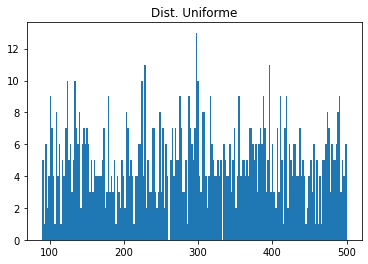

In [7]:
# import the required libraries 
import matplotlib.pyplot as plt 
# store the random numbers in a list 
min = 500
max = 90
samples = 1000

nums = mc_uniform(min, max, samples)
#nums /= nums.sum()

# # plotting a graph 
plt.title('Dist. Uniforme')
plt.hist(nums, bins=200);

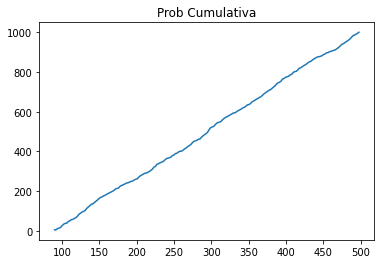

In [8]:
plt.title('Prob Cumulativa')
hist, bins = np.histogram(nums, bins=200)
plt.plot( bins[:-1], np.cumsum(hist))

## Normal Distribution

In [9]:
def mc_normal(mean, std_dev, samples):
    "Sampling from the Normal Distribution)"
    results = []
    for i in range(samples):
        results.append(np.random.normal(mean, std_dev))
    return np.array(results)

il min è: 230
il max è: 770


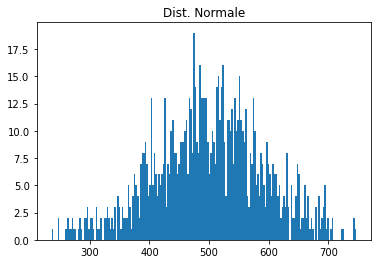

In [10]:
# import the required libraries 
import matplotlib.pyplot as plt 
# store the random numbers in a list 
samples = 1000
mean = 500
std_dev = 90

nums = mc_normal(mean, std_dev, samples)
        
# # plotting a graph 
plt.title('Dist. Normale')
plt.hist(nums, bins = 200);

min = mean-3*std_dev
max = mean+3*std_dev

print(f"il min è: {min}")
print(f"il max è: {max}")

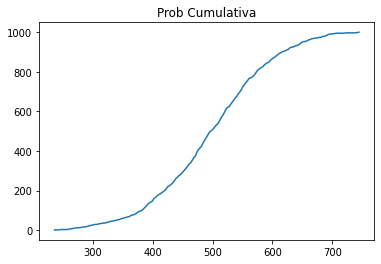

In [11]:
plt.title('Prob Cumulativa')
hist, bins = np.histogram(nums, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

## Triangular

In [12]:
def mc_triangle(min, mode, max, samples):
    results = []
    for _ in range(samples):
        results.append(np.random.triangular(min, mode, max))
    return np.array(results)

il min è: 20
la moda è: 32
il max è: 36


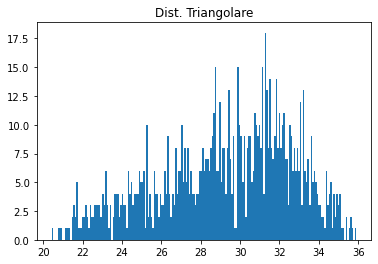

In [13]:
# import the required libraries 
import matplotlib.pyplot as plt 
# store the random numbers in a list 
samples = 1000
min = 20 
max = 36
mode = 32

nums = mc_triangle(min, mode, max, samples)

# # plotting a graph 
plt.title('Dist. Triangolare')
plt.hist(nums, bins = 200);

print(f"il min è: {min}")
print(f"la moda è: {mode}")
print(f"il max è: {max}")

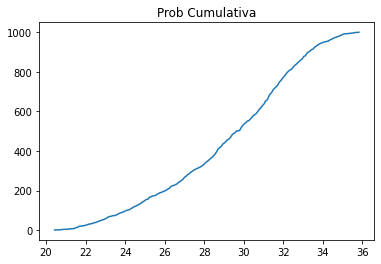

In [14]:
plt.title('Prob Cumulativa')
hist, bins = np.histogram(nums, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

In [15]:
# configuration
n = 10000 # number of samples
upper_limit = 33 # upper limit from specification

# components
component_1 = mc_normal(5,1,n)
component_2 = mc_normal(10,1,n)
component_3 = mc_normal(15,1,n)

# relationships
total = component_1 + component_2 + component_3

# success conditions
probability = np.sum(total > upper_limit)/len(total)*100
print("Probability of exceeding the time limit: ", round(probability, 3), "%")

Probability of exceeding the time limit:  4.06 %


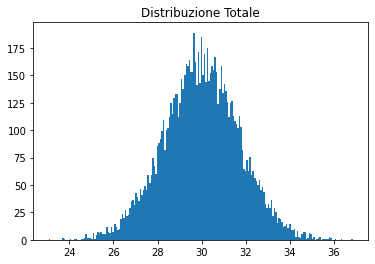

In [16]:
# # plotting a graph 
plt.title('Distribuzione Totale')
plt.hist(total, bins = 200);

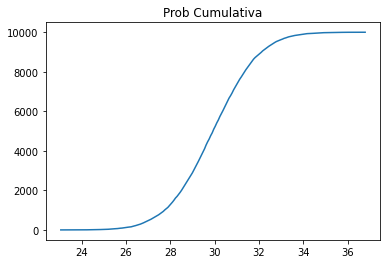

In [17]:
plt.title('Prob Cumulativa')
hist, bins = np.histogram(total, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

In [18]:
# configuration
n = 1000 # number of samples
limit = 0 # limit from specification
# components
component_1 = mc_triangle(3.8, 4.0, 4.4,n)
component_2 = mc_triangle(5.9, 6.0, 6.5,n)
component_3 = mc_triangle(5.8, 6.0, 6.1,n)
component_4 = mc_uniform(16.4, 16.6, n)
# relationships
total = component_4 - component_1 - component_2 - component_3
# success conditions
probability = np.sum(total < limit)/len(total)*100
print("Probability of not fitting the blocks: ", round(probability, 4), "%")

Probability of not fitting the blocks:  4.9 %


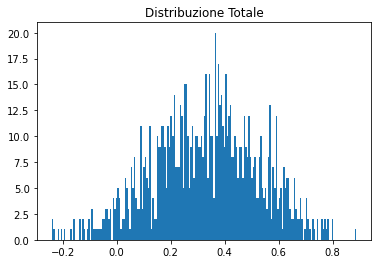

In [19]:
# # plotting a graph 
plt.title('Distribuzione Totale')
plt.hist(total, bins = 200);

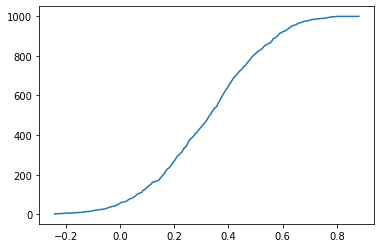

In [20]:
hist, bins = np.histogram(total, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

## Functions for Simulation

In [21]:
############## UNIFORM ################################
def mc_uniform(min, max, samples):
    "Sampling from the Normal Distribution)"
    results = []
    for i in range(samples):
        results.append(np.random.uniform(min, max))
    return np.array(results)

############## TRIANGULAR ################################
def mc_triangle(min, mode, max, samples):
    results = []
    for _ in range(samples):
        results.append(np.random.triangular(min, mode, max))
    return np.array(results)

############## NORMAL ################################
def mc_normal(mean, std_dev, samples):
    "Sampling from the Normal Distribution)"
    results = []
    for i in range(samples):
        results.append(np.random.normal(mean, std_dev))
    return np.array(results)

In [22]:
def hist(data, bins, title, labels, range = None):
    fig = plt.figure(figsize=(15, 8))
    ax = plt.axes()
    plt.ylabel("Proportion")
    values, base, _ = plt.hist( data  , bins = bins, alpha = 0.5, color = "green", range = range, label = "Simulation")
    ax_bis = ax.twinx()
    values = np.append(values,0)
    ax_bis.plot( base, np.cumsum(values)/ np.cumsum(values)[-1], color='darkorange', marker='o', linestyle='-', markersize = 1, label = "Cumulative Probability" )
    plt.xlabel(labels)
    plt.ylabel("Probability")

    plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data.mean()*1.1, max_ylim*0.01, 'Mean: {:.2f}'.format(data.mean()))

    plt.title(title)
    ax_bis.legend();
    ax.legend();
    plt.show()
    return


# success conditions
def check_prob(total,threshold):
    probability = np.sum(total <= threshold)/len(total)*100
    return print(f"Probability to be below: {threshold} is", round(probability, 2), "%")

from ipywidgets import interactive
def test(total):
    threshold = total.mean()
    return interactive(lambda threshold: (check_prob(total,threshold), threshold), threshold=(int(total.min()),int(total.max()),1))

## Deli data

# Deli case

_INPUT_

**Cost of capital: 15%**

**Investment: 120,000 €**

**Average profile tickets**
* Coffees: 50 units, 1.00 € price, 82% contribution margin
* Breakfasts: 20 units, 2.20 € price, 80% contribution margin
* Snacks: 12 units, 3.50 € price, 65% contribution margin
* Beverages: 18 units, 2.00 € price, 70% contribution margin
* Total: 100 units, 1.72 € average price, 75% average contribution margin

**Medium shopping centre**
Average daily tickets: 494 (min 407, max 581)
Fixed costs structure: 286,000 €

**Big shopping centre**
Average daily tickets: 1017 (min 872, max 1163)
Fixed costs structure: 374,000 €


In [23]:
fixedCosts = 374000
costOfCapital = 0.15
investment = 120000

coffeePrice = 1
coffeeCM = 0.82
breakfastPrice = 2.2
breakfastCM = 0.80
snackPrice = 3.5
snackCM = 0.65
beveragePrice = 2
beverageCM = 0.70

In [24]:
# coffee(500,90)
# breakfasts(200,36)
# snacks(120,22)
# beverages(180,32)

In [25]:
n=5000
coffees = mc_normal(500,90,n)
breakfasts = mc_normal(200,36,n)
snacks = mc_normal(120,22,n)
beverages = mc_normal(180,32,n)



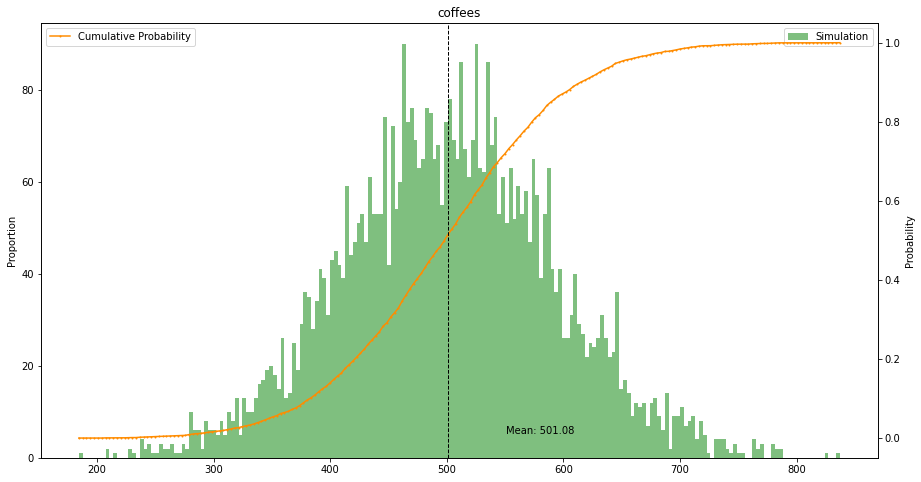

interactive(children=(IntSlider(value=510, description='threshold', max=837, min=184), Output()), _dom_classes…

In [38]:
hist(coffees,200,'coffees','labels')
test(coffees)

In [37]:
dailyTickets = coffees + breakfasts + snacks + beverages
dailyRevenue = coffees * coffeePrice + breakfasts * breakfastPrice + snacks * snackPrice + beverages * beveragePrice
dailyIncome  = coffees * coffeePrice * coffeeCM + breakfasts * breakfastPrice * breakfastCM + snacks * snackPrice * snackCM + beverages * beveragePrice * beverageCM

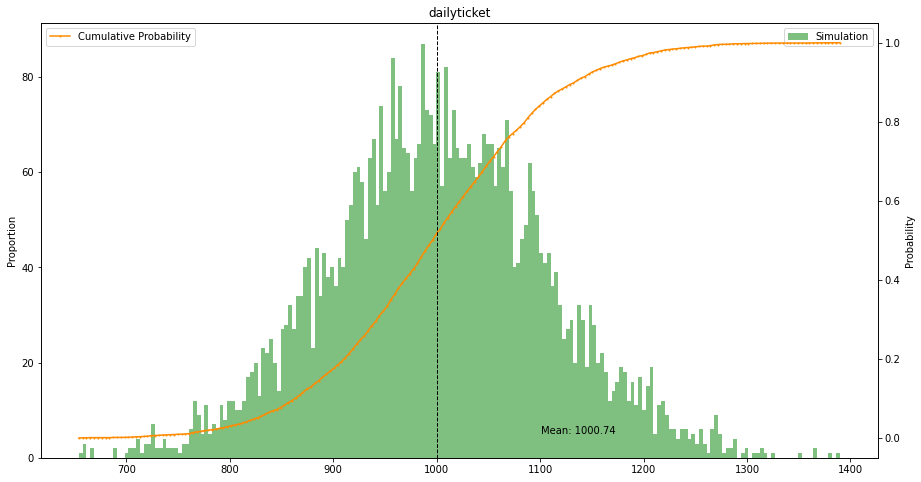

interactive(children=(IntSlider(value=1021, description='threshold', max=1389, min=654), Output()), _dom_class…

In [26]:
hist(dailyTickets,200,'dailyticket','labels')
test(dailyTickets)

In [27]:
cumulative_dailyTickets = np.cumsum(dailyTickets)/ np.cumsum(dailyTickets)[-1]
cumulative_dailyTickets

array([1.92769489e-04, 3.52498889e-04, 6.03194680e-04, ...,
       9.99626139e-01, 9.99809944e-01, 1.00000000e+00])

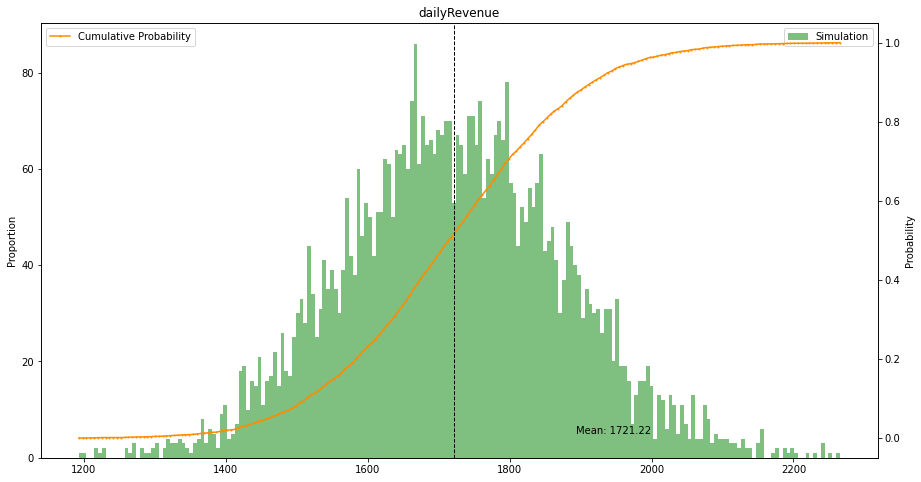

interactive(children=(IntSlider(value=1729, description='threshold', max=2265, min=1193), Output()), _dom_clas…

In [28]:
hist(dailyRevenue,200,'dailyRevenue','labels')
test(dailyRevenue)

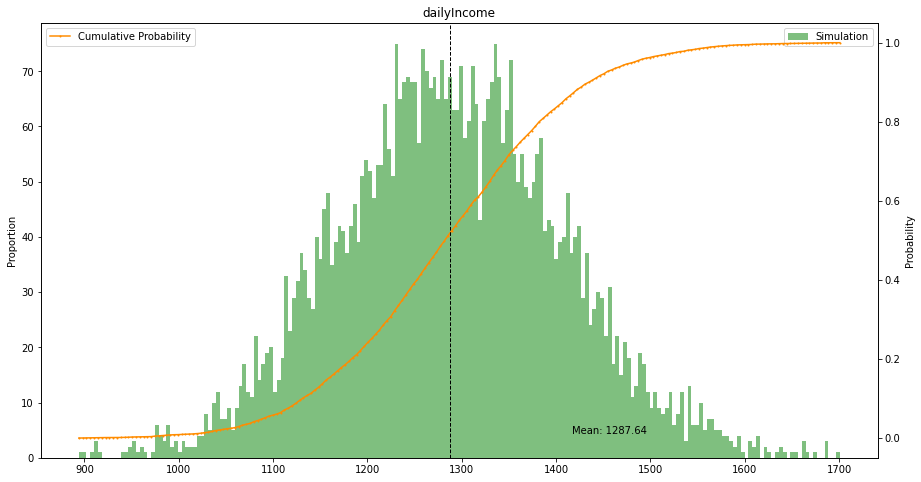

interactive(children=(IntSlider(value=1297, description='threshold', max=1700, min=894), Output()), _dom_class…

In [29]:
hist(dailyIncome,200,'dailyIncome','labels')
test(dailyIncome)

In [30]:
days = 310

yearlyTickets = dailyTickets * days

In [31]:

yearlyTickets

array([299015.158278  , 247764.89234497, 388867.77230012, ...,
       361431.22912766, 285109.84715219, 294806.69071601])

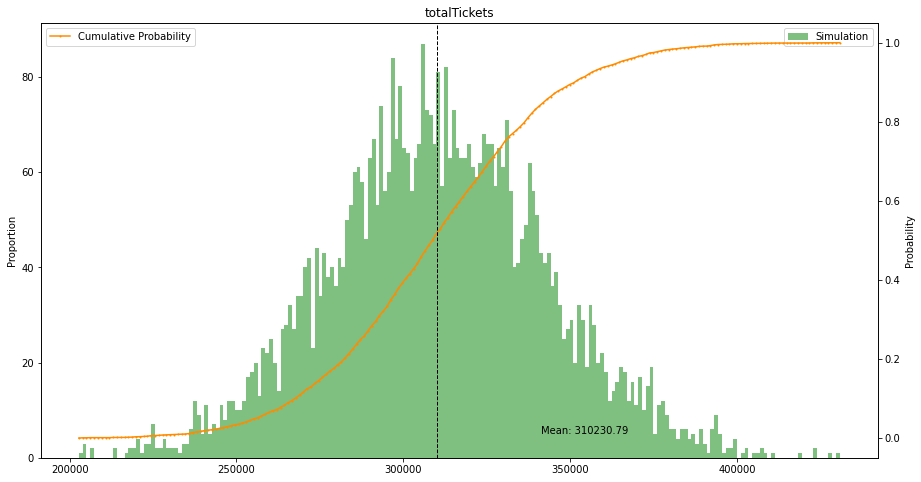

interactive(children=(IntSlider(value=316791, description='threshold', max=430799, min=202784), Output()), _do…

In [32]:
hist(yearlyTickets,200,'totalTickets','labels')
test(yearlyTickets)

In [33]:
yearlyRevenues = dailyRevenue * days
yearlyOperatingIncome = dailyIncome * days

In [34]:
fixedCosts = 374000
investment = 120000

yearlyNetIncome = yearlyOperatingIncome - fixedCosts
roi = yearlyNetIncome / investment * 100
roi

print("Investment      : ", round(investment,2),            "€")
print("Daily tickets   : ", round(dailyTickets.mean(),0),          "tickets")
print("Revenues        : ", round(yearlyRevenues.mean(),2),        "€")
print("Operating Income: ", round(yearlyOperatingIncome.mean(),2), "€") 
print("Fixed cost      : ", round(fixedCosts,2),            "€")
print("Net Income      : ", round(yearlyNetIncome.mean(),2),       "€")
print("ROI             : ", round(roi.mean(),2),                   "%")

Investment      :  120000 €
Daily tickets   :  1001.0 tickets
Revenues        :  533578.54 €
Operating Income:  399169.31 €
Fixed cost      :  374000 €
Net Income      :  25169.31 €
ROI             :  20.97 %


In [51]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

def logistic_sigmoid(xx, vv, b):
    return 1 / (1 + np.exp(-(np.dot(vv, xx) + b)))

grid_size = 0.01
x_grid = np.arange(-5, 5, grid_size)


def plot_logistic_sigmoid(vv1, bb1, vv2, bb2):
    plt.plot(x_grid, logistic_sigmoid(x_grid, vv=vv1, b=bb1), '-b')
    plt.plot(x_grid, logistic_sigmoid(x_grid, vv=vv2, b=bb2), '-r')
    plt.axis([-5, 5, -0.5, 1.5])
    plt.show()

####################################################################

interact(
    plot_logistic_sigmoid,
    vv1=(-12, 10, 1),
    bb1=(-10, 10),
    vv2=(-10, 12),
    bb2=(-10, 10),
    )

test(yearlyTickets)

interactive(children=(IntSlider(value=-1, description='vv1', max=10, min=-12), IntSlider(value=0, description=…

interactive(children=(IntSlider(value=316791, description='threshold', max=430799, min=202784), Output()), _do…